In [1]:
import mediapy as media
import os
import matplotlib.pyplot as plt
import matplotlib.cm as pltcm
import numpy as np
from PIL import Image

In [2]:
#constants 
assets_path = "./assets"

def get_path_to_video(video_file_name):
    return os.path.join(assets_path, video_file_name)

video1_file_path = get_path_to_video('video1_category1.mp4')
video2_file_path = get_path_to_video('video2_category1.mp4')
video3_file_path = get_path_to_video('video3_category2.mp4')
video4_file_path = get_path_to_video('video4_category2.mp4')

NUM_OF_GRAY_LEVELS = 256

def get_video_by_file_path(path): 
    return media.read_video(path)

def get_grayscale_video(video) -> np.ndarray:
    num_frames, height, width, channels = video.shape
    greyscale_video = np.empty((num_frames, height, width), dtype=np.uint8)

    for i in range(num_frames):
        greyscale_video[i] = get_greyscale_array_from_frame(video[i])

    return greyscale_video
        
def get_greyscale_array_from_frame(frame) -> np.ndarray:
    return np.array(Image.fromarray(np.array(frame)).convert('L'))

def get_greyscale_video_by_file_path(path):
    return get_grayscale_video(get_video_by_file_path(path))
        
    
# from now on we will assume that frame is a 2-dim np array

In [3]:
video1 = get_greyscale_video_by_file_path(video1_file_path)

In [4]:
# functions for creating histograms 
bins = np.arange(NUM_OF_GRAY_LEVELS + 1)
bins_values = np.arange(NUM_OF_GRAY_LEVELS)

def get_frame_histogram(frame) -> np.array:
    hist, _ = np.histogram(frame, bins=bins)
    return hist

def get_video_histogram(video) -> np.ndarray:
    num_frames, _, _ = video.shape
    video_hist = np.zeros((num_frames, len(bins_values)))
    for i in range(num_frames):
        video_hist[i] = get_frame_histogram(video[i])
    return video_hist

def cumsum(histogram):
    return np.cumsum(histogram)

def cumsum_along_y(matrix):
    """
    Calculate the cumulative sum along the y-axis for each x in a 2D array.

    Parameters:
    - matrix (np.ndarray): Input 2D array.

    Returns:
    - cumsum_result (np.ndarray): 2D array containing cumulative sum for each x along the y-axis.
    """
    # Calculate cumulative sum along the y-axis
    cumsum_result = np.cumsum(matrix, axis=1)

    return cumsum_result


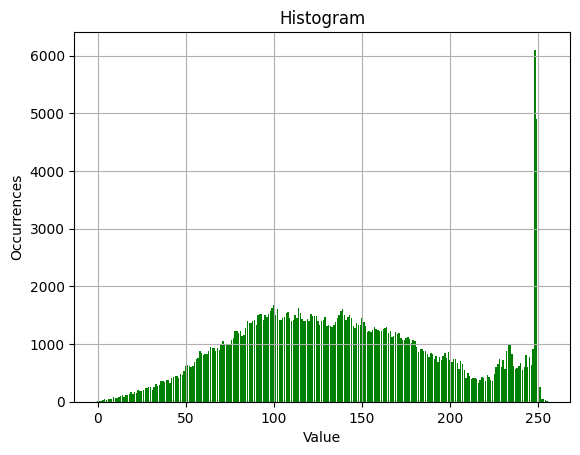

In [5]:
frame = video1[200]
# Create a histogram with custom bins
hist = get_frame_histogram(frame)
plt.bar(bins_values, hist, color='green')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.grid(True)
plt.show()


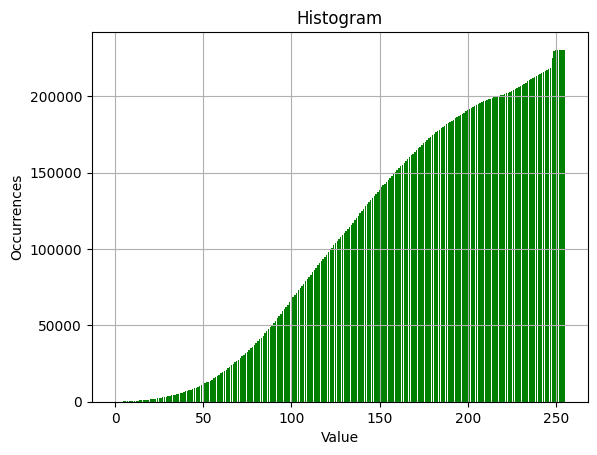

In [6]:
cum_hist = cumsum(hist)
plt.bar(bins_values, cum_hist, color='green')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Occurrences')
plt.grid(True)
plt.show()

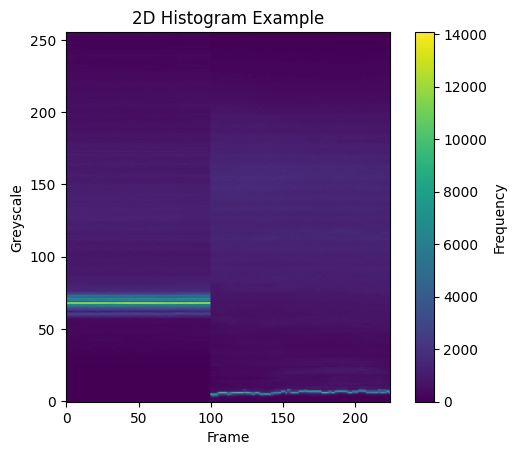

In [7]:
video_histogram = get_video_histogram(video1)
hist_to_show = np.rot90(video_histogram)
plt.imshow(hist_to_show,cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()


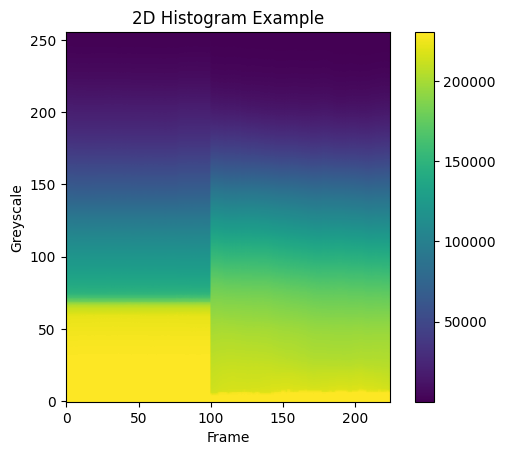

In [8]:
video_cumsum_histogram = cumsum_along_y(video_histogram)
hist_to_show = np.rot90(video_cumsum_histogram)
plt.imshow(hist_to_show,cmap='viridis')
plt.colorbar()
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()
# dist = calculate_distance(video_histogram)
# plt.plot(dist)


99


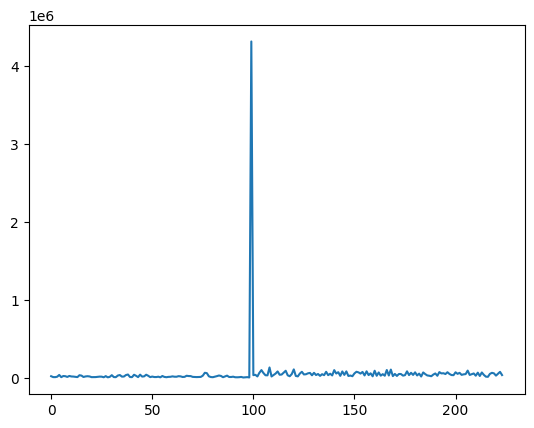

In [9]:
def sum_diff_consecutive_rows(matrix):
    """
    Calculate the sum of differences between consecutive rows in a 2D matrix.

    Parameters:
    - matrix (np.ndarray): Input 2D matrix.

    Returns:
    - sum_diff (np.ndarray): 1D array containing the sum of differences for each column.
    """
    # Calculate differences between consecutive rows
    signed_matrix = matrix.astype(np.int64)
    # Calculate absolute differences between consecutive rows
    abs_diff = np.abs(np.diff(signed_matrix, axis=0))
    # Sum absolute differences along the axis representing rows
    sum_abs_diff = np.sum(abs_diff, axis=1)        
    return sum_abs_diff    



cumsum_histogram_distance = sum_diff_consecutive_rows(video_cumsum_histogram)
plt.plot(cumsum_histogram_distance)
print(np.argmax(cumsum_histogram_distance))

In [10]:
# hist1 = video_cumsum_histogram[0].astype(np.int64)
# hist2 = video_cumsum_histogram[1].astype(np.int64)
# mat = np.stack([hist1, hist2], axis=0)
# mat = video_cumsum_histogram[:3, :10].astype(np.int64)
# print(mat)
# print(mat.shape)
# Calculate absolute differences between consecutive rows
# abs_diff = np.abs(np.diff(mat, axis=0))
# print(abs_diff)
# Sum absolute differences along the axis representing rows
# sum_abs_diff = np.sum(abs_diff, axis=1)
    
# print(sum_abs_diff)

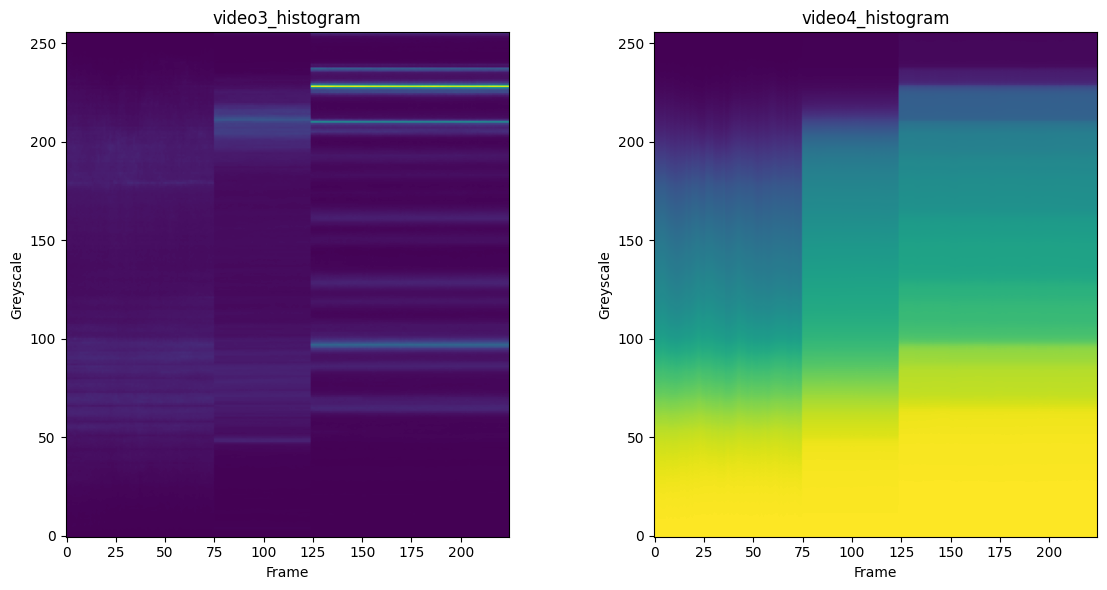

In [11]:
video3 = get_greyscale_video_by_file_path(video4_file_path)
video4_histogram = cumsum_along_y(get_video_histogram(video3))
video4 = get_greyscale_video_by_file_path(video4_file_path)
video3_histogram = get_video_histogram(video3)


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original histogram
axs[0].imshow(np.rot90(video3_histogram), cmap='viridis')
axs[0].set_title('video3_histogram')
axs[0].set_xlabel('Frame')
axs[0].set_ylabel('Greyscale')
axs[0].invert_yaxis()
axs[0].grid(False)

# Plot the rotated histogram
axs[1].imshow(np.rot90(video4_histogram), cmap='viridis')
axs[1].set_title('video4_histogram')
axs[1].set_xlabel('Frame')
axs[1].set_ylabel('Greyscale')
axs[1].invert_yaxis()
axs[1].grid(False)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
from scipy.ndimage import gaussian_filter
def blur_image(image, sigma):
    """
    Apply Gaussian blur to an image.

    Parameters:
    - image (np.ndarray): Input image as a 2D NumPy array.
    - sigma (float): Standard deviation of the Gaussian filter. Default is 1.0.

    Returns:
    - blurred_image (np.ndarray): Blurred image.
    """
    # Apply Gaussian blur
    blurred_image = gaussian_filter(image, sigma)

    return blurred_image

def blur_video(video, sigma=1.0):
    blured_video = np.zeros(video.shape)
    with media.VideoWriter('./assets/grey_scale.mp4', (video.shape[1],video.shape[2]), fps=25) as writer:
        for i in range(video.shape[0]):
            image = blur_image(video[i], sigma)
            blured_video[i] = blur_image(image, sigma=sigma)
            writer.add_image(image)    
    
    return blured_video

In [ ]:
blured_video = blur_video(video3, 40) 
video_histogram = get_video_histogram(blured_video)
hist_to_show = np.rot90(video_histogram)
plt.imshow(hist_to_show,cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()



In [ ]:
# def quantize_video(image) -> np.ndarray: 
frame_a = video3[20]
frame_b = video3[50]
hist_a, hist_edges = np.histogram(video3, bins=9, range=(0,255)) 
hist_edges = hist_edges.astype(np.uint8)
hist_edges

In [ ]:
def map_to_closest_values(matrix, values):
    """
    Map each pixel value in a 2D matrix to the closest value in the given array.

    Parameters:
    - matrix (np.ndarray): Input 2D matrix of integers.
    - values (np.ndarray): Array of integers to map to.

    Returns:
    - mapped_matrix (np.ndarray): Matrix with each pixel value mapped to the closest value in the array.
    """
    # Flatten the matrix and values arrays for easier computation
    flat_matrix = matrix.flatten()
    flat_values = values.flatten()

    # Find the index of the closest value in values for each pixel in the matrix
    closest_indices = np.argmin(np.abs(flat_matrix[:, np.newaxis] - flat_values), axis=1)

    # Map each pixel value to the closest value in values
    mapped_matrix = flat_values[closest_indices].reshape(matrix.shape)

    return mapped_matrix


def quantize_video(video, values_arr):
    quantized_video = np.zeros(video.shape).astype(np.uint8)
    with media.VideoWriter('./assets/grey_scale.mp4', (video.shape[1],video.shape[2]), fps=25) as writer:
        for i in range(video.shape[0]):
            image = map_to_closest_values(video[i], values_arr)
            quantized_video[i] = image
            writer.add_image(image)    
    
    return quantized_video

In [ ]:
quantized_video = quantize_video(video3, hist_edges)

In [ ]:
video_histogram = get_video_histogram(quantized_video)
hist_to_show = np.rot90(video_histogram)
plt.imshow(hist_to_show,cmap='viridis')
plt.colorbar(label='Frequency')
plt.title('2D Histogram Example')
plt.xlabel('Frame')
plt.ylabel('Greyscale')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
video4_histogram = cumsum_along_y(video_histogram)
cumsum_histogram_distance = sum_diff_consecutive_rows(video4_histogram)
plt.plot(cumsum_histogram_distance)
print(np.argmax(cumsum_histogram_distance))